## Jupyter Notebook: Parsing CSV file and Visualizing Data

In this notebook, we will load a CSV file, convert it to a pandas DataFrame, and then create multiple county specific map visualizations using matplotlib and seborn

In [29]:
pip install pandas matplotlib seaborn


[notice] A new release of pip available: 22.3.1 -> 24.2
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


## Step 1: Import Libraries

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Step 2: Load Data

In [31]:
file_path = 'LEARCATCrosstabData_V2.csv'
df = pd.read_csv(file_path)
df.head(15)

,State,Data Year,Count
0,Alabama,2016,3055.0
1,Alabama,2017,3050.0
2,Alabama,2018,2030.0
3,Alabama,2019,3913.0
4,Alabama,2020,12951.0
5,Alabama,2021,161409.0
6,Alabama,2022,225771.0
7,Alabama,2023,213108.0
8,Alaska,2021,15208.0
9,Alaska,2022,14631.0


## Step 3: Handle missing values and data types

In [32]:
df = df.dropna(subset=['State', 'Data Year', 'Count'])
df['Data Year'] = df['Data Year'].astype(int)
df['Count'] = pd.to_numeric(df['Count'], errors='coerce')
df = df.dropna(subset=['Count'])

## Step 4: Plot time series line graph

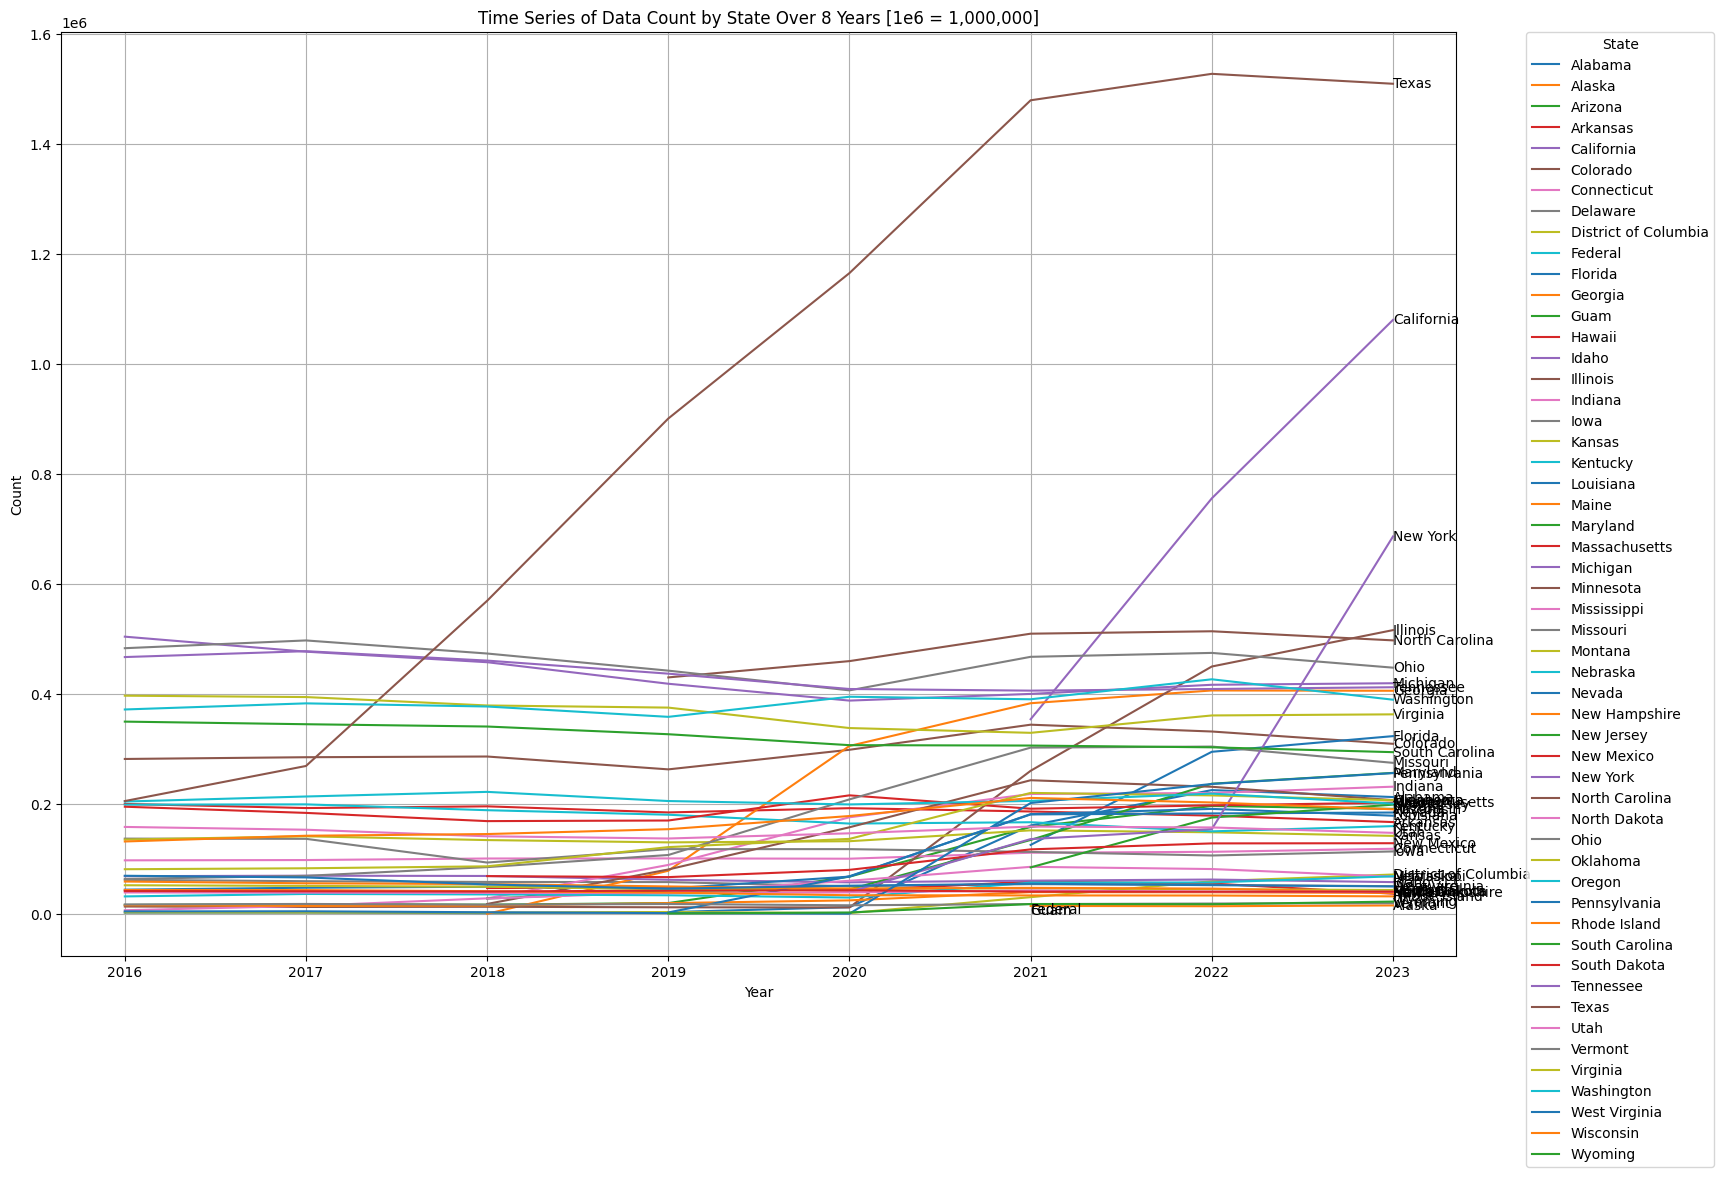

In [33]:
plt.figure(figsize=(18, 12))

# Plotting data
for state in df['State'].unique():
    state_data = df[df['State'] == state]
    
    # Plot the time series for the state
    plt.plot(state_data['Data Year'], state_data['Count'], label=state)
    
    # Get the last point in the time series
    last_year = state_data['Data Year'].max()
    last_count = state_data[state_data['Data Year'] == last_year]['Count'].values[0]
    
    # Add the state name as text near the last point
    plt.text(last_year, last_count, state, fontsize=10, verticalalignment='center')

plt.title('Time Series of Data Count by State Over 8 Years [1e6 = 1,000,000]')
plt.xlabel('Year')
plt.ylabel('Count')

# Adjust the position of the legend or remove it if you prefer labels on the lines
plt.legend(title='State', loc='upper left', bbox_to_anchor=(1.05, 1), borderaxespad=0)

plt.grid(True)
plt.show()
